In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import Operators as op
import SensingMatrix as sm
import Measurements as me
from SetUpImage import setUpImage
from Displays import phase_retrie_plots
import solve

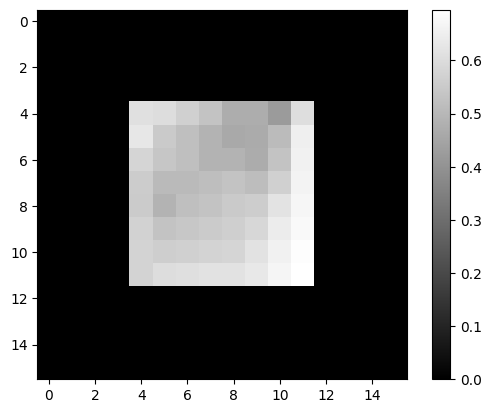

In [12]:
Nx, Ny = 16, 16
n = Nx * Ny
true_images, mask = setUpImage(Nx, Ny) 

#map.f(x_true) < 1e-5

plt.imshow(true_images[1].imag, cmap='gray')
plt.colorbar()

In [13]:
x_true = true_images[1]
x_true_vect = x_true.reshape(Nx * Ny, )

#print("x_true_vect", x_true_vect)
#x = (1 + 2j)*np.ones(x_true_vect.shape)

#noise_lvl = 0.e-4
A = sm.FourierMatrix(Nx,Ny) #sm.iid_stdd_Gauss(Nx,Ny)
#print("A.Matrix", A.Matrix)
#meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
#map = op.operators(algo = 'complex mirror', meas = meas, A = A)
#map.f( x)
#print(map.psi(2 * x), map.psi(1 * x), map.breg_psi(2 * x, x))

iteration k 0
iteration k 100
iteration k 200
iteration k 300
iteration k 400
a 2.5952996070370714e-05
t 0.999974049024394
a 1.5616422028290096e-05
t 0.9999843843095437
a 1.0336574042080621e-05
t 0.999989663746479
a 2.6266182588573813e-05
t 0.9999737358869311
a 1.5791925653600287e-05
t 0.9999842088224539
a 1.0474256934973521e-05
t 0.9999895260721813
a 3.2834030851408116e-05
t 0.9999671692029446
a 1.9266883516096206e-05
t 0.9999807342300364
a 1.3567147335311913e-05
t 0.9999864334048373
a 0.0005162320563986123
t 0.999484565783223
a 0.0002580900455294439
t 0.999742109579831
a 0.00025814201086916825
t 0.9997420576948456
a 0.06457708224358476
t 0.9454286502462386
a 0.03150977613321875
t 0.9711403344439723
a 0.03306730611036601
t 0.9698356959248163
a 9.222757923299056
t 0.4017888632171281
a 4.494086381853688
t 0.48554996608019513
a 4.728671541445372
t 0.47930735912952294
a 1327.2018200044956
t 0.0882365272172545
a 646.6531233147197
t 0.11118511424495527
a 680.5486966897759
t 0.10938157106915

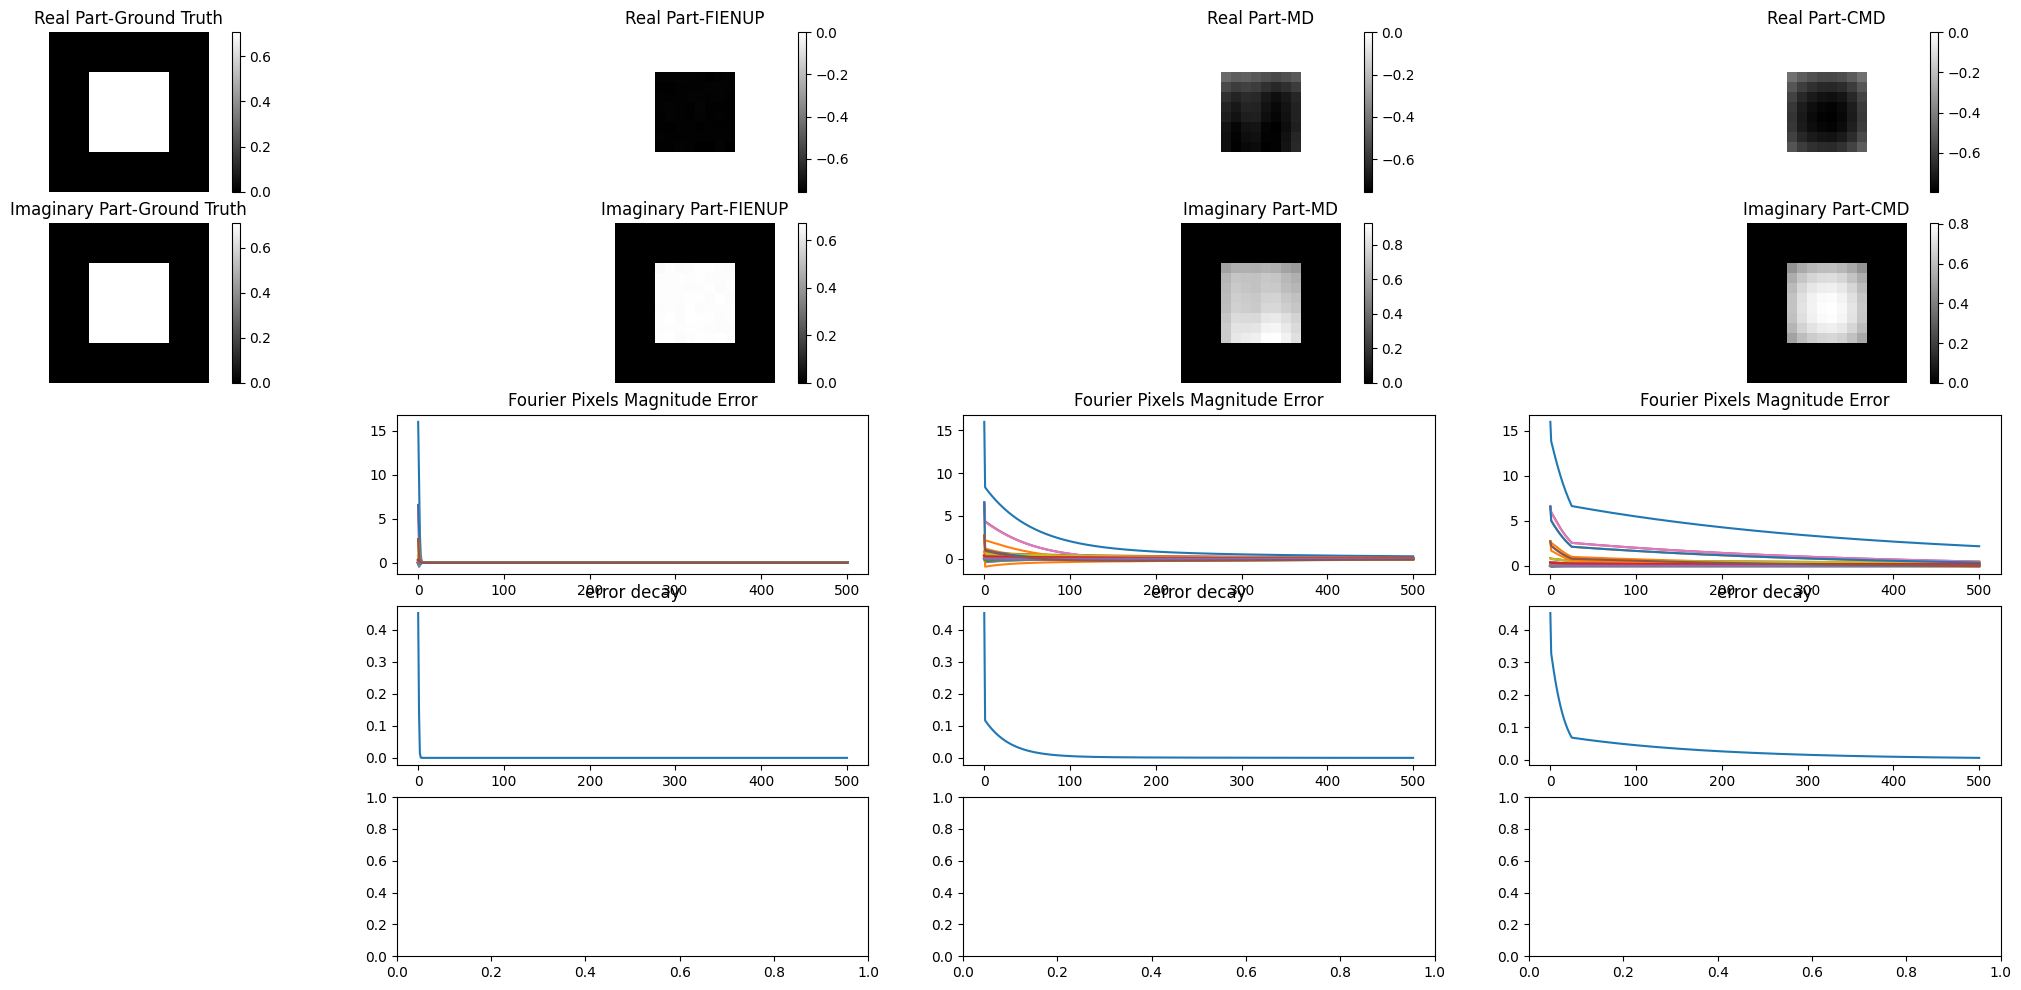

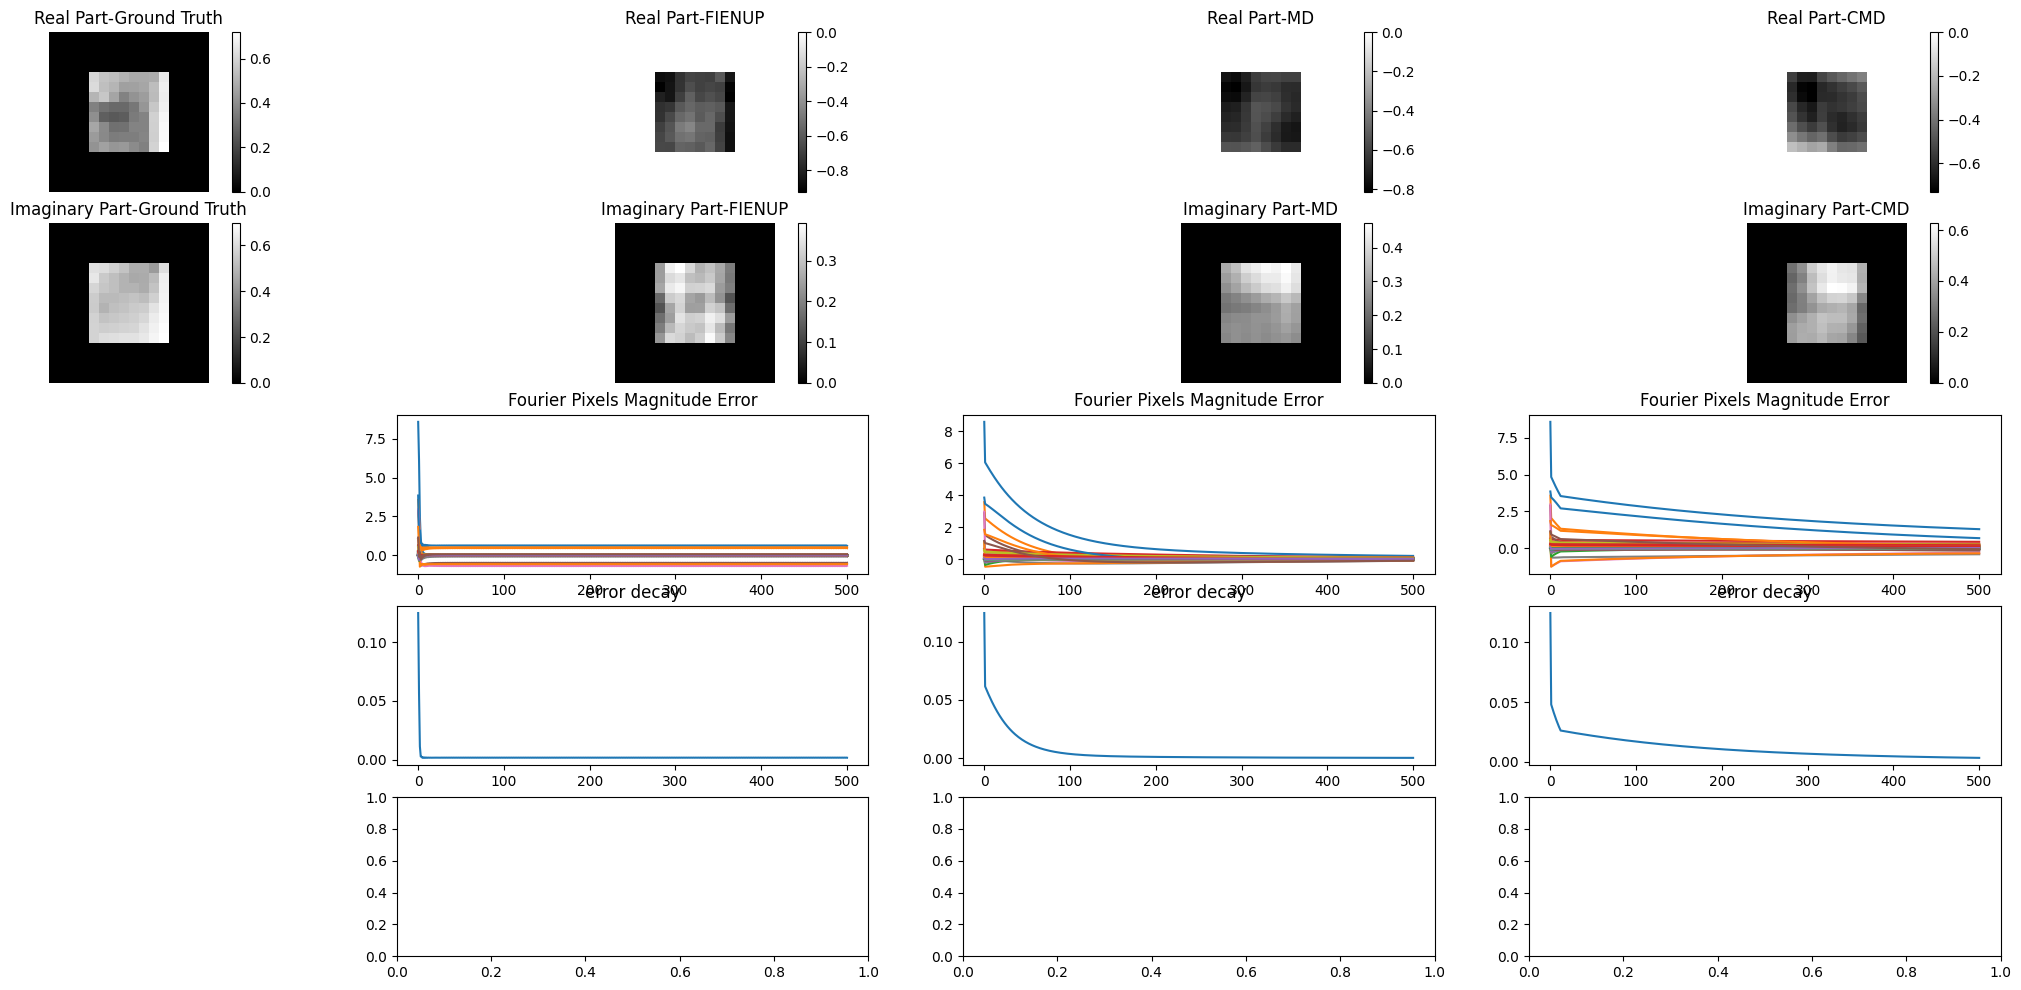

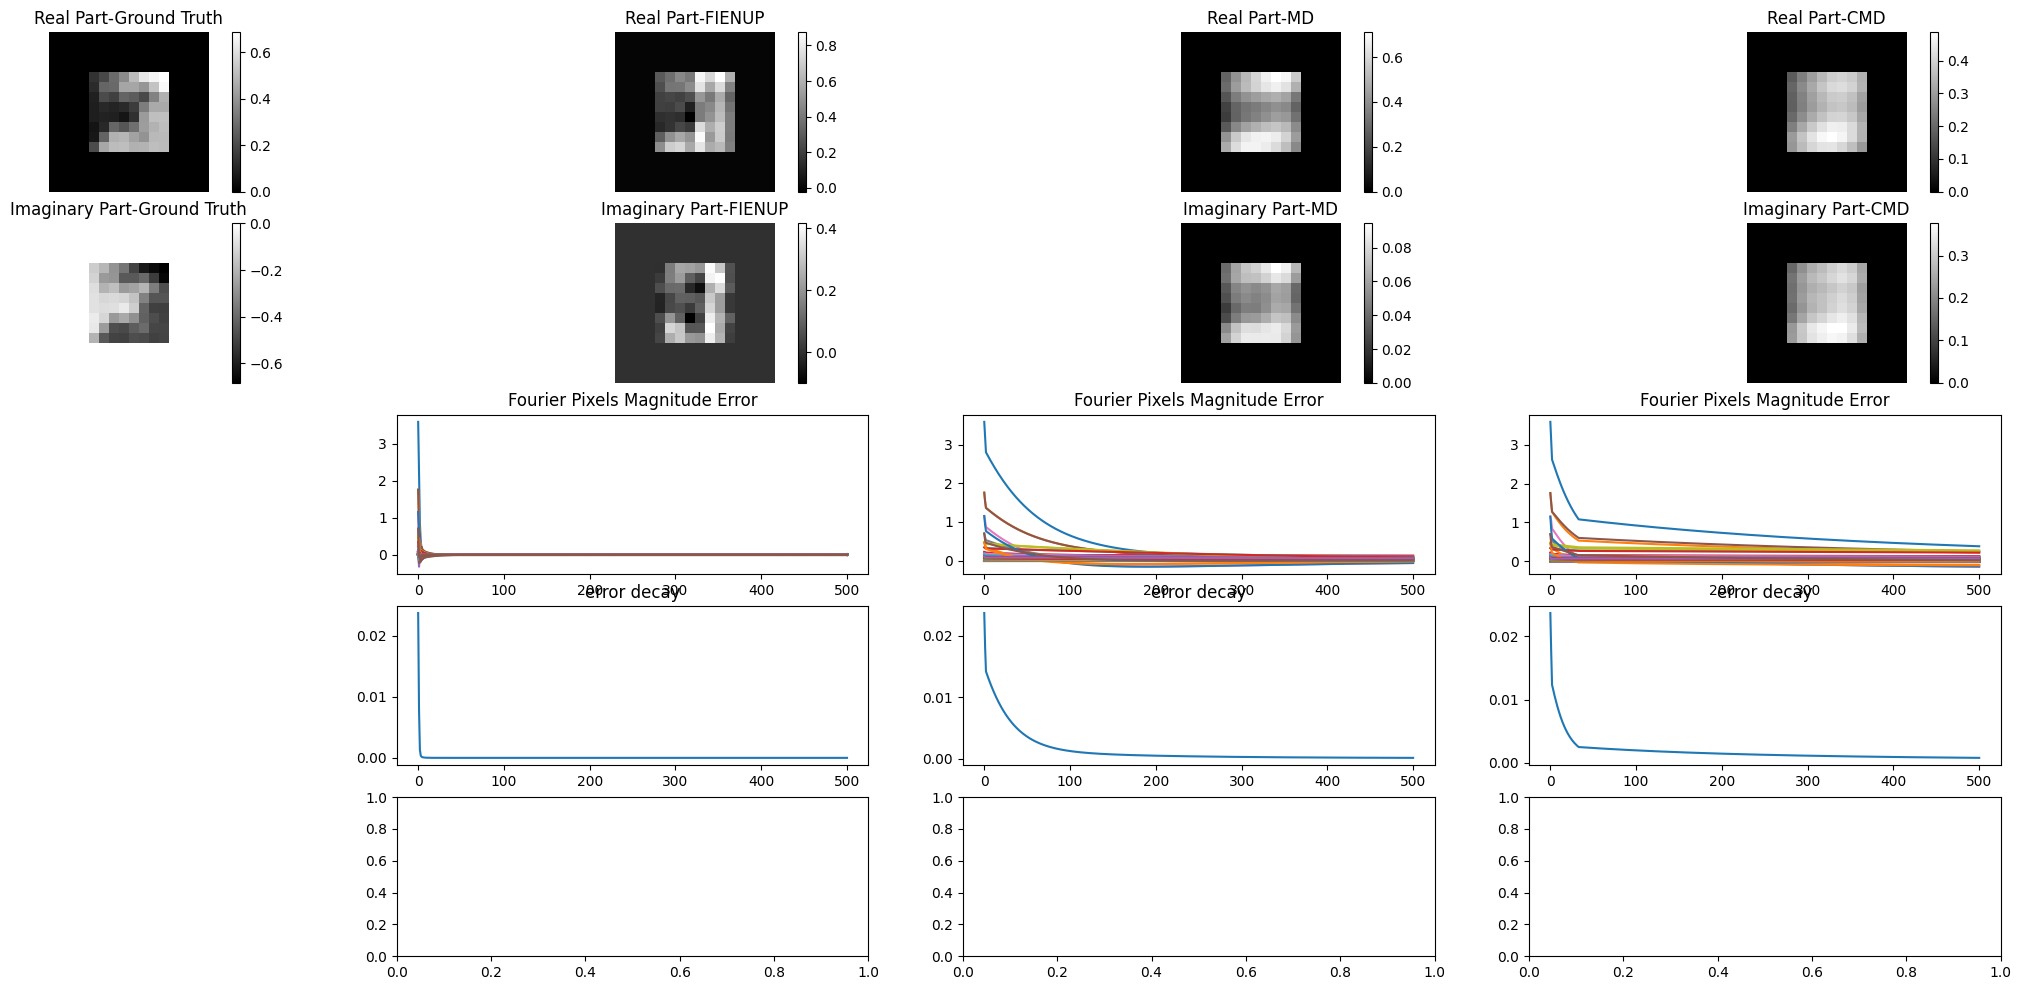

In [15]:
idx = np.arange(len(true_images)) #[0, 1] # np.arange(1) 
Algos = ['FIENUP', 'real mirror', 'complex mirror' ]

#fig = plt.figure(figsize=(28,12))
for i in idx:
    X_sols = []
    x_true = true_images[i]
    x_true_vect = x_true.reshape(Nx * Ny, )
    maxiter = 500
    kappa  = 0.9
    xi = 12
    noise_lvl = 1.e-4
    meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
    L = 1 * op.smoothnessPara_L(A.Matrix, noise)
    #print("meas", meas)
    x0 = op.initialise(n, meas, A.Matrix, type ='Gaussian', real = 1, imag = 1, x_true_vect = x_true_vect, mask = mask, noise_lvl = noise_lvl**(0.5) )
    for Algo in Algos:
        map = op.operators(algo = Algo, meas = meas, A = A) 
        x_sols = solve.phase_retrieval(L, kappa, xi, Algo, map, mask, n, A.Matrix, meas, maxiter, x0 )
        X_sols.append(x_sols)
    phase_retrie_plots(i, true_images, X_sols, map, A, meas, maxiter)